In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load Data
df = pd.read_csv('loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.describe() #descriptive statistics for the numerical columns

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [5]:
df.nunique() #returns the number of unique values in each column

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [6]:
# Clean Column Names & String Values

df.columns = df.columns.str.strip()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
# categorical variables converted into numerical format

df['education']     = df['education'].replace({'Not Graduate': 0, 'Graduate': 1}).astype(int)
df['self_employed'] = df['self_employed'].replace({'No': 0, 'Yes': 1}).astype(int)
df['loan_status']   = df['loan_status'].replace({'Rejected': 0, 'Approved': 1}).astype(int)

df.head()

C:\Users\shali\AppData\Local\Temp\ipykernel_45812\518169260.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education']     = df['education'].replace({'Not Graduate': 0, 'Graduate': 1}).astype(int)
C:\Users\shali\AppData\Local\Temp\ipykernel_45812\518169260.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['self_employed'] = df['self_employed'].replace({'No': 0, 'Yes': 1}).astype(int)
C:\Users\shali\AppData\Local\Temp\ipykernel_45812\518169260.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and wi

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


Available Columns: ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


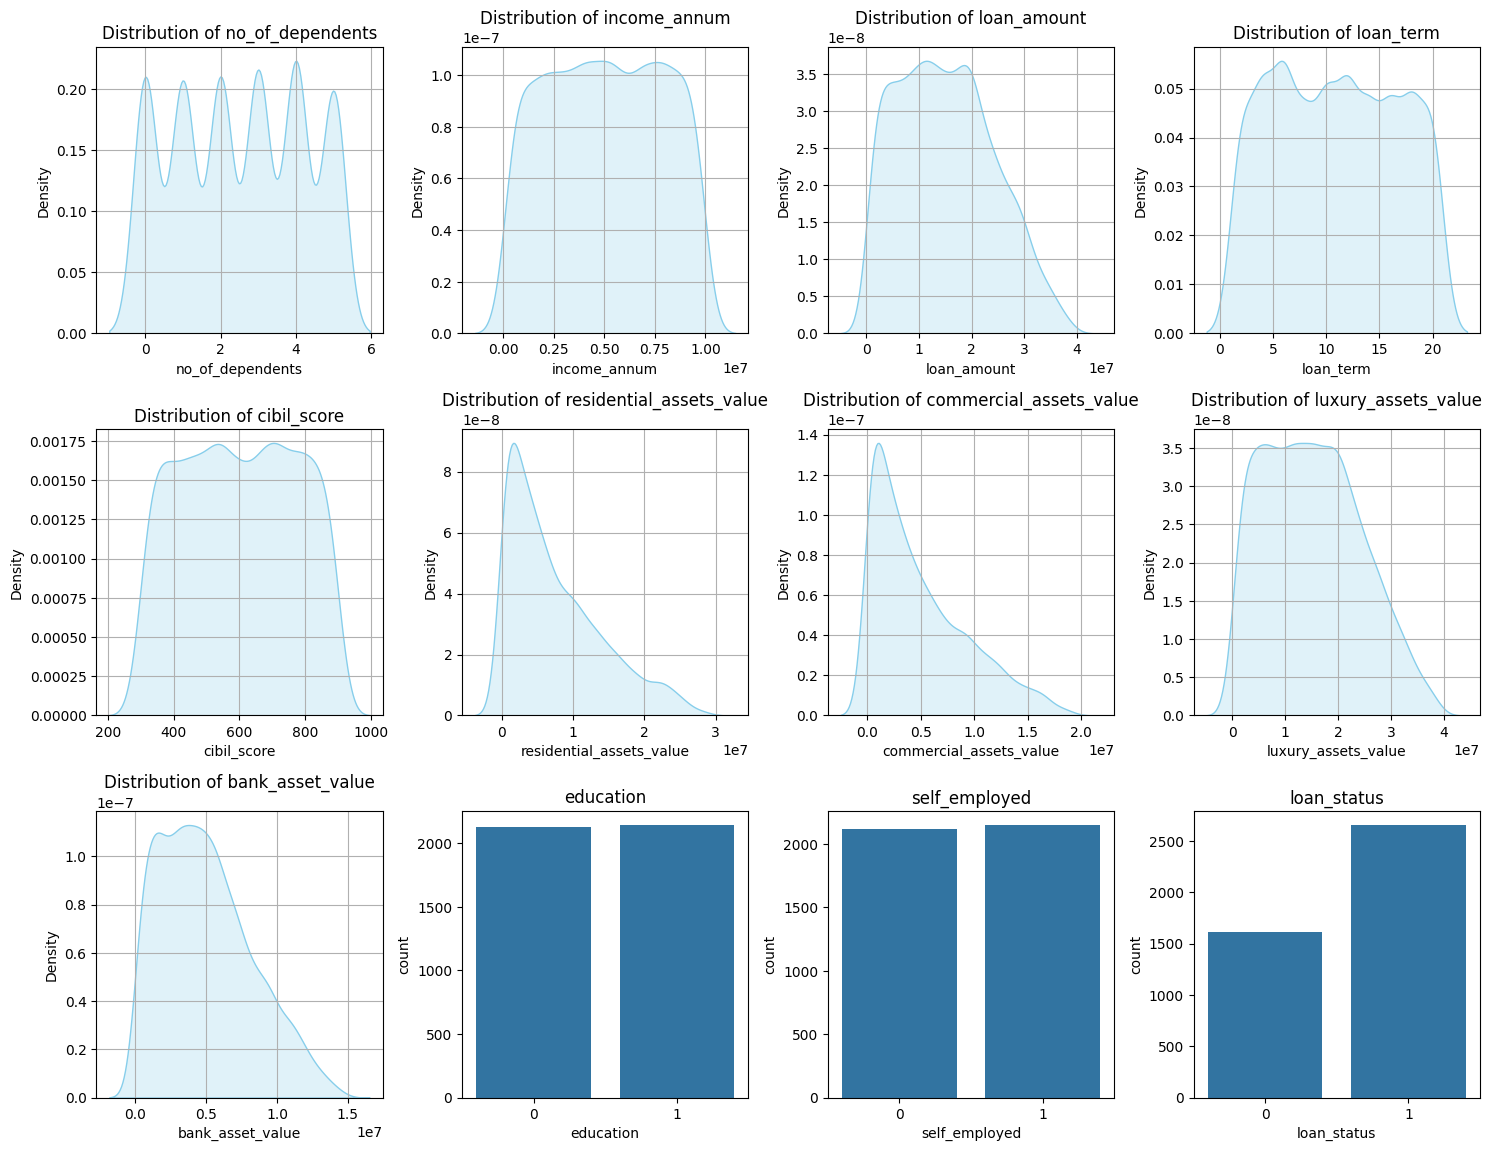

In [8]:
# Univariate Analysis


# removes extra spaces and capital letters
df.columns = df.columns.str.strip().str.lower()

print("Available Columns:", df.columns.tolist())

# Define list of numeric column names
numerical_columns = [
    col for col in [
        'no_of_dependents','income_annum','loan_amount','loan_term','cibil_score',
        'residential_assets_value','commercial_assets_value',
        'luxury_assets_value','bank_asset_value'
    ] if col in df.columns                         #ensures no error occurs if any column is missing
]

# Define list of categorical column names
categorical_columns = [
    col for col in ['education', 'self_employed', 'loan_status'] if col in df.columns
]

# For numerical columns
plt.figure(figsize=(15,15))
for i,col in enumerate(numerical_columns):
    plt.subplot(4,4,i+1)
    sns.kdeplot(df[col].dropna(), fill=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)


# For categorical columns
for j, col in enumerate(categorical_columns, start=len(numerical_columns)):
    plt.subplot(4,4,j+1)
    sns.countplot(x=df[col])
    plt.xlabel(col)
    plt.title(f"Count of {col}")
    plt.title(col)
    
plt.tight_layout()
plt.show()

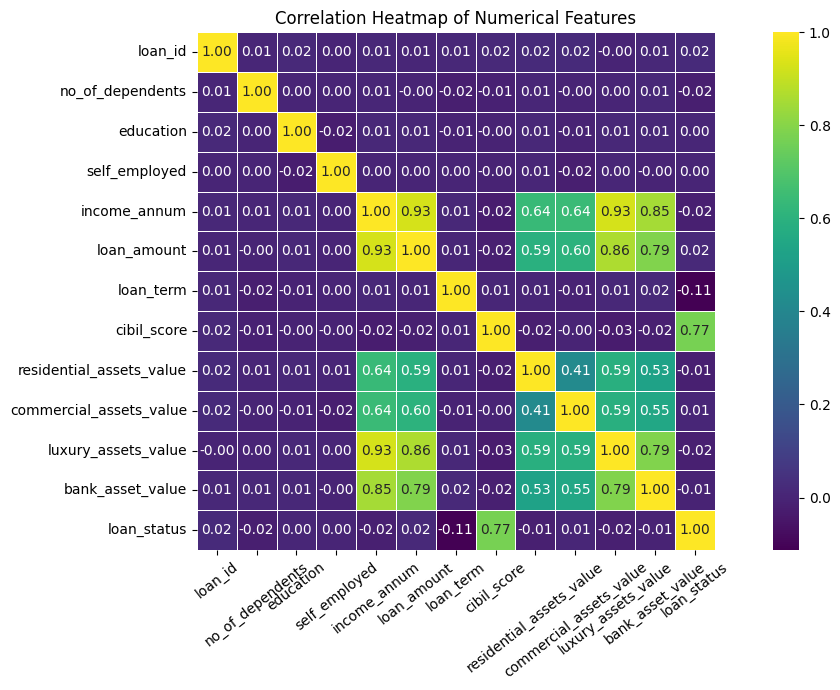

In [9]:
# Bi-variate & Multi-variate Analysis

# Checks if the column exists, converts its values to numeric
if 'no_of_dependents' in df.columns:
    df['no_of_dependents'] = pd.to_numeric(df['no_of_dependents'], errors='coerce')

# Filter to find columns that are integers or floats
numerical_columns = df.select_dtypes(include=['int64','float64']).columns


# 1. Correlation Heatmap
corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 7))
sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation coefficients
    cmap='viridis',        # Color map style
    fmt=".2f",             # Format for numbers
    square=True,           # Make each cell square
    linewidths=0.5         # Lines between cells
)
plt.title("Correlation Heatmap of Numerical Features")
plt.xticks(rotation=38)
plt.tight_layout()
plt.show()

C:\Users\shali\AppData\Local\Temp\ipykernel_45812\4202937946.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='viridis')


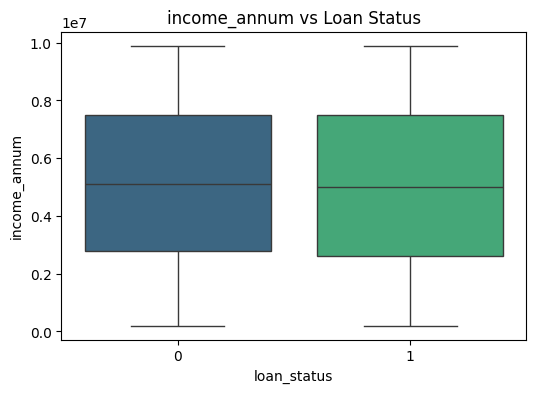

C:\Users\shali\AppData\Local\Temp\ipykernel_45812\4202937946.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='viridis')


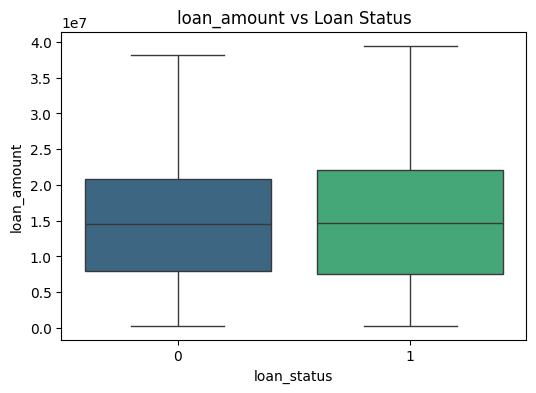

C:\Users\shali\AppData\Local\Temp\ipykernel_45812\4202937946.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='viridis')


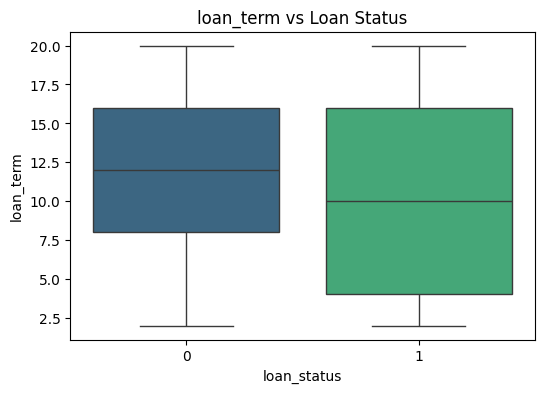

C:\Users\shali\AppData\Local\Temp\ipykernel_45812\4202937946.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='viridis')


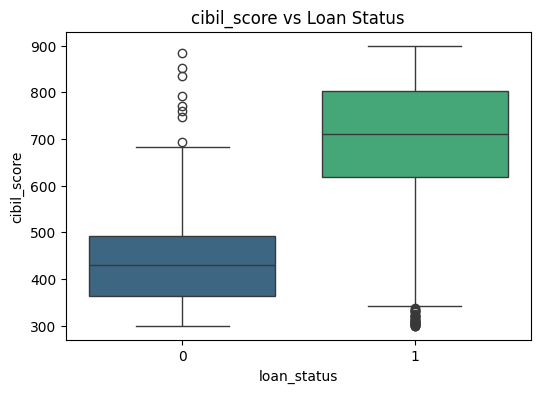

C:\Users\shali\AppData\Local\Temp\ipykernel_45812\4202937946.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='viridis')


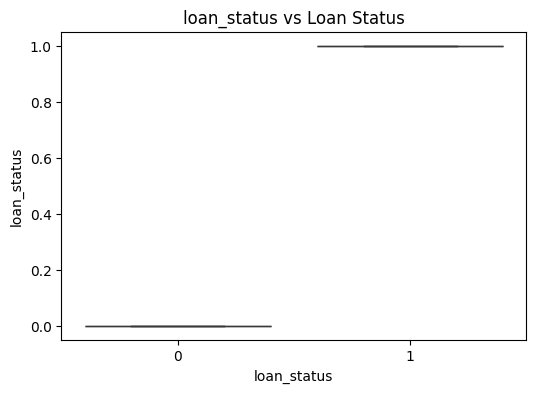

C:\Users\shali\AppData\Local\Temp\ipykernel_45812\4202937946.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='viridis')


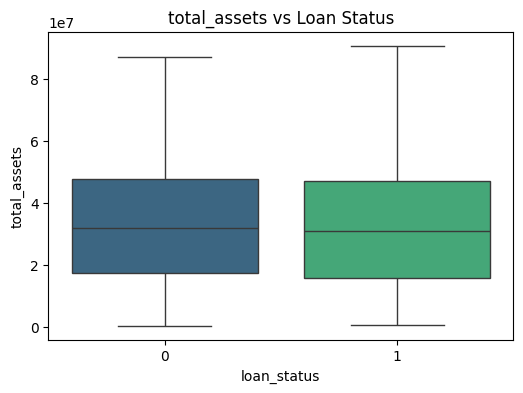

In [15]:
#2. Numerical Features vs Loan Status (Boxplots)

numerical_columns = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'loan_id']

if 'loan_status' in df.columns:
    for col in numerical_columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x='loan_status', y=col, data=df, palette='viridis')
        plt.title(f"{col} vs Loan Status")
        plt.show()

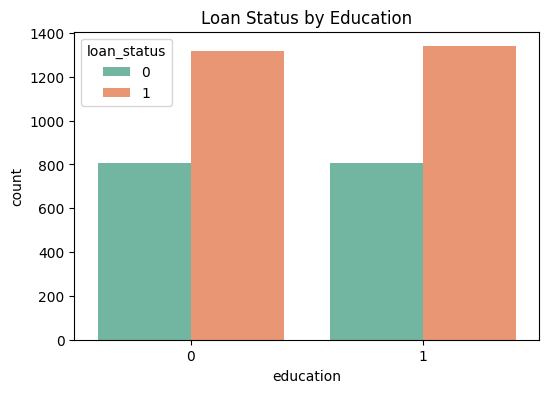

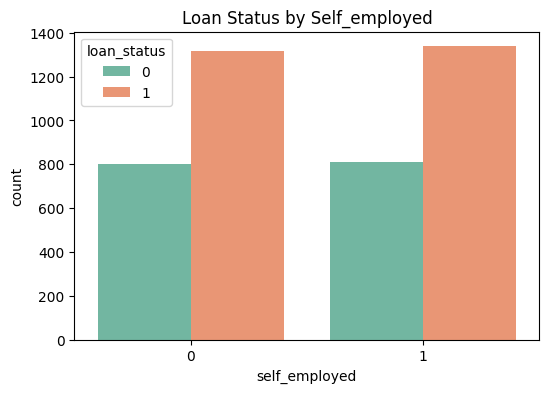

In [11]:
# 3. Categorical Features vs Loan Status (Countplots)
categorical_columns = [col for col in ['education', 'self_employed'] if col in df.columns]

for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='loan_status', data=df, palette='Set2')
    plt.title(f"Loan Status by {col.capitalize()}")
    plt.show()

In [12]:
# Create a Combined 'Total Assets' Column & Clean Up 

# Define columns that are assumed to represent different types of assets
asset_cols = [
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]

# keep only those columns that are actually present in the DataFrame
asset_cols = [col for col in asset_cols if col in df.columns]

# Create total_assets if any asset columns were found to combine related variables into one
if asset_cols:
    df['total_assets'] = df[asset_cols].sum(axis=1)
    # Drop original asset columns
    df.drop(columns=asset_cols, inplace=True)

# Preview updated dataset
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,total_assets
0,1,2,1,0,9600000,29900000,12,778,1,50700000
1,2,0,0,1,4100000,12200000,8,417,0,17000000
2,3,3,1,0,9100000,29700000,20,506,0,57700000
3,4,3,1,0,8200000,30700000,8,467,0,52700000
4,5,5,0,1,9800000,24200000,20,382,0,55000000


Accuracy: 0.9110070257611241

 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       323
           1       0.92      0.94      0.93       531

    accuracy                           0.91       854
   macro avg       0.91      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854



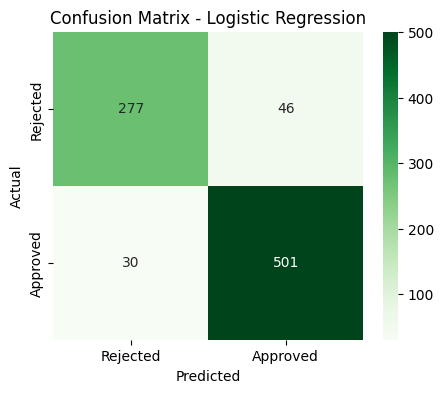

In [13]:
# Logistic Regression Model


# Drop irrelevant columns
df.drop(columns=['loan_id', 'no_of_dependents', 'education', 'self_employed'], inplace=True, errors='ignore')

X = df.drop(columns='loan_status')  #All independent variables (features)
y = df['loan_status']               #Dependent variable (target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()                   #transforms features to have:Mean = 0, Standard deviation = 1
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# predict loan status for test data
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))                            #Shows overall correctness of the model
print("\n Classification Report:\n", classification_report(y_test, y_pred))   #Gives:Precision,Recall,F1-score,Support

# Confusion Matrix: This shows:True Positives (TP),True Negatives (TN),False Positives (FP),False Negatives (FN)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["Rejected","Approved"], yticklabels=["Rejected","Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()